In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, random, array, argsort
from pyod.models.ocsvm import OCSVM

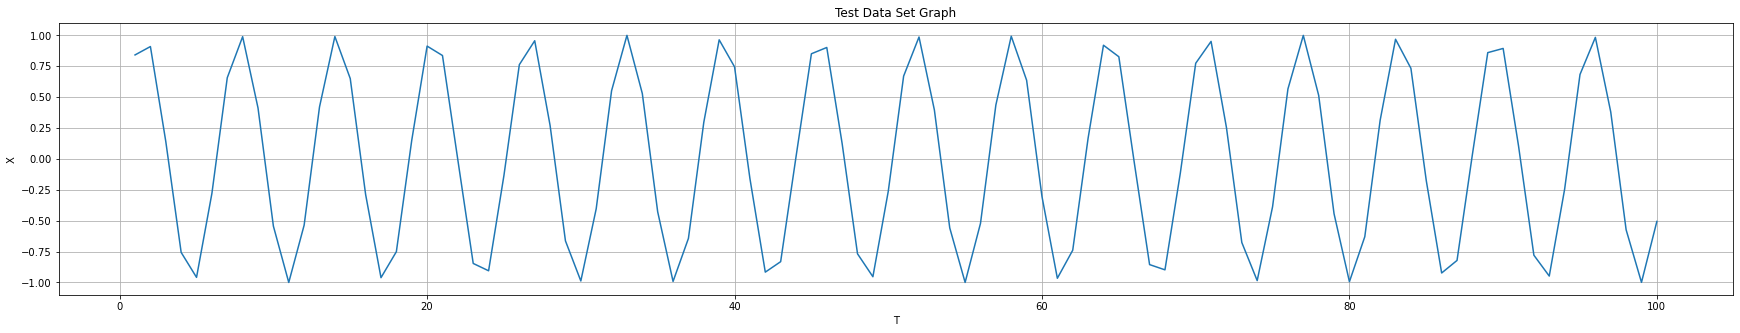

In [150]:
t=np.linspace(1,100,100)
x=np.sin(t)

data={"T": t,
     "X": x}

data=pd.DataFrame(data)

plt.figure(figsize=(30, 5))
plt.grid()
plt.title("Test Data Set Graph")
plt.xlabel("T")
plt.ylabel("X")
plt.plot(data["T"], data["X"])

In [151]:
print(f"Length of DataSet: {len(data)}")
train=data[0:75]
test=data[75:100]
print(f"Length of Training DataSet: {len(train)}")
print(f"Length of Testing DataSet: {len(test)}")

Length of DataSet: 100
Length of Training DataSet: 75
Length of Testing DataSet: 25


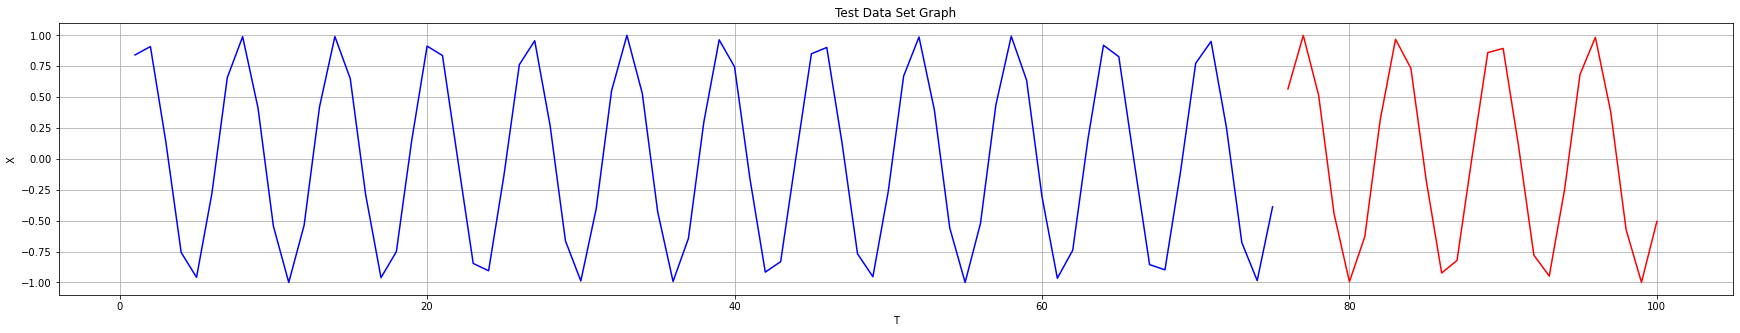

In [152]:
plt.figure(figsize=(30, 5))
plt.grid()
plt.title("Test Data Set Graph")
plt.xlabel("T")
plt.ylabel("X")
plt.plot(train["T"], train["X"], color='blue')
plt.plot(test["T"], test["X"], color='red')

In [161]:
trainX=np.array(train)
testX=np.array(test)

In [162]:
trainX

array([[ 1.00000000e+00,  8.41470985e-01],
       [ 2.00000000e+00,  9.09297427e-01],
       [ 3.00000000e+00,  1.41120008e-01],
       [ 4.00000000e+00, -7.56802495e-01],
       [ 5.00000000e+00, -9.58924275e-01],
       [ 6.00000000e+00, -2.79415498e-01],
       [ 7.00000000e+00,  6.56986599e-01],
       [ 8.00000000e+00,  9.89358247e-01],
       [ 9.00000000e+00,  4.12118485e-01],
       [ 1.00000000e+01, -5.44021111e-01],
       [ 1.10000000e+01, -9.99990207e-01],
       [ 1.20000000e+01, -5.36572918e-01],
       [ 1.30000000e+01,  4.20167037e-01],
       [ 1.40000000e+01,  9.90607356e-01],
       [ 1.50000000e+01,  6.50287840e-01],
       [ 1.60000000e+01, -2.87903317e-01],
       [ 1.70000000e+01, -9.61397492e-01],
       [ 1.80000000e+01, -7.50987247e-01],
       [ 1.90000000e+01,  1.49877210e-01],
       [ 2.00000000e+01,  9.12945251e-01],
       [ 2.10000000e+01,  8.36655639e-01],
       [ 2.20000000e+01, -8.85130929e-03],
       [ 2.30000000e+01, -8.46220404e-01],
       [ 2.

In [163]:
# train one_class_svm detector
clf_name = 'OneClassSVM'
clf = OCSVM()
clf.fit(trainX)

OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [164]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [165]:
# get the prediction on the test data
y_test_pred = clf.predict(testX)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(testX)  # outlier scores

In [167]:
y_train_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0])

In [168]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [166]:
len(y_test_pred)

25

In [139]:
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize